In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes,svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import ast

%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
train = pd.read_csv("/content/train_tokenized_again.csv")
test = pd.read_csv("/content/valid_tokenized_again.csv")

In [ ]:
train.head()

,Unnamed: 0,text,updated,text_final
0,0,"['nice', 'interview']",1.0,"['nice', 'interview']"
1,1,"['seriounited', 'states', 'of', 'america', 'en...",-1.0,"['seriounited', 'state', 'america', 'energy']"
2,2,['yess'],-1.0,['yes']
3,3,"['shea', 'inspire']",1.0,"['shea', 'inspire']"
4,4,"['i', 'cackle']",0.0,['cackle']


In [ ]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0',axis =1)

In [ ]:
def string2list(data):
    for i, sentence in enumerate(data):
        res = ast.literal_eval(sentence)
        data[i] = res
    # return data

In [ ]:
train=train.reset_index()
test = test.reset_index()

In [ ]:
string2list(train.text)
string2list(test.text)
string2list(train.text_final)
string2list(test.text_final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train.text[0]

['nice', 'interview']

In [ ]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

for i,sen in enumerate(train['text']):
  train['text'][i] = listToString(sen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i,sen in enumerate(test['text']):
  test['text'][i] = listToString(sen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head()

,text,updated,text_final
0,nice interview,1.0,"[nice, interview]"
1,seriounited states of america energy,-1.0,"[seriounited, state, america, energy]"
2,yess,-1.0,[yes]
3,shea inspire,1.0,"[shea, inspire]"
4,i cackle,0.0,[cackle]


In [ ]:
train.updated = train.updated.astype(int)

In [ ]:
test.updated = test.updated.astype(int)

In [ ]:
Test_X = test['text']
Test_Y = test['updated']

In [ ]:
Train_X, Valid_X, Train_Y, Valid_Y = model_selection.train_test_split(train['text'],train['updated'],test_size=0.3,shuffle=True)

In [ ]:
Train_Y = Train_Y.replace(to_replace ="Non_hope_speech", value =0)
Train_Y = Train_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Test_Y = Test_Y.replace(to_replace ="Non_hope_speech", value =0)
Test_Y = Test_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Valid_Y = Valid_Y.replace(to_replace ="Non_hope_speech", value =0)
Valid_Y = Valid_Y.replace(to_replace ="Hope_speech", value =1)
Valid_Y.unique()

array([1, 0])

In [ ]:
# Other method for doing operations done in above 1 cell
# can use either of them
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Valid_Y = Encoder.fit_transform(Valid_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#Tokenization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Valid_X_Tfidf = Tfidf_vect.transform(Valid_X)

In [ ]:
a = ['madonna for everything you have helped']
b = Tfidf_vect.transform(a)

In [ ]:
b

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
print(Train_X_Tfidf)

  (0, 4715)	0.4182503387482151
  (0, 4705)	0.3028841720400499
  (0, 4578)	0.1709654513506782
  (0, 4321)	0.17775830299537032
  (0, 3165)	0.1490116917100456
  (0, 2747)	0.2933645057229492
  (0, 2718)	0.21145352400491807
  (0, 2522)	0.23677000425902942
  (0, 771)	0.5478275122758892
  (0, 557)	0.22725138057914018
  (0, 149)	0.2543186664949825
  (0, 113)	0.21685163153802106
  (1, 4529)	0.23890775951034693
  (1, 4527)	0.5731896871181436
  (1, 4344)	0.3900746347811901
  (1, 3667)	0.32502971101095424
  (1, 2544)	0.47262128119361585
  (1, 2116)	0.22950048236318915
  (1, 139)	0.28378298829488774
  (2, 2257)	0.2720226589205008
  (2, 2015)	0.38933346827332516
  (2, 1849)	0.701391729809585
  (2, 1239)	0.5314816693648076
  (3, 4783)	0.5130781987265939
  (3, 2574)	0.658262478693819
  :	:
  (11554, 3501)	0.39070177808330553
  (11554, 3165)	0.09973828369657536
  (11554, 3068)	0.11879338945818058
  (11554, 2161)	0.42846624636929814
  (11554, 1978)	0.25178965170971496
  (11554, 1239)	0.13116585532368147

Text(0, 0.5, 'Frequency')

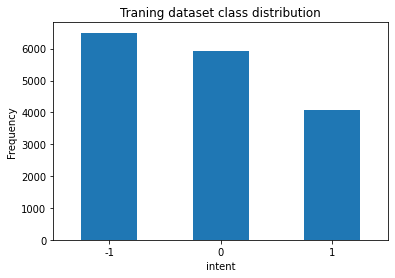

In [ ]:


count_classes = pd.value_counts(train['updated'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Traning dataset class distribution")
plt.xlabel("intent")
plt.ylabel("Frequency")

**Naive Bayes**

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Valid_X_Tfidf)
print("Naive Bayes Accuracy Score on valid set-> ",accuracy_score(predictions_NB, Valid_Y)*100)

Naive Bayes Accuracy Score on valid set->  61.9095680258377


In [ ]:
# accuracy on test set
predictions_NB_T = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score on test set-> ",accuracy_score(predictions_NB_T, Test_Y)*100)

Naive Bayes Accuracy Score on test set->  62.03034682080924


In [ ]:
#Training set accuracy Naive bayes
predictions_NB_Tr = Naive.predict(Train_X_Tfidf)
print("Naive Bayes Accuracy Score on training set -> ",accuracy_score(predictions_NB_Tr, Train_Y)*100)

Naive Bayes Accuracy Score on training set ->  74.17149779354504


In [ ]:
print ('\n*Classification Report: Naive bayes\n', classification_report(Test_Y, predictions_NB_T))
confusion_matrix(Test_Y, predictions_NB_T)


*Classification Report: Naive bayes
               precision    recall  f1-score   support

          -1       0.59      0.70      0.64      1072
           0       0.60      0.69      0.65       990
           1       0.76      0.40      0.53       706

    accuracy                           0.62      2768
   macro avg       0.65      0.60      0.60      2768
weighted avg       0.64      0.62      0.61      2768



array([[747, 264,  61],
       [277, 687,  26],
       [238, 185, 283]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_NB_T).ravel()
print(tn,fp,fn,tp)

2566 2 262 9


**SVM**

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Valid_X_Tfidf)
print("SVM Accuracy Score on valid set-> ",accuracy_score(predictions_SVM, Valid_Y)*100)

SVM Accuracy Score on valid set->  64.89705288655631


In [ ]:
#accuracy on test set
predictions_SVM_T = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score test set -> ",accuracy_score(predictions_SVM_T, Test_Y)*100)

SVM Accuracy Score test set ->  65.24566473988439


In [ ]:
# Training set accuracy SVM
predictions_SVM_Tr = SVM.predict(Train_X_Tfidf)
print("SVM Accuracy Score on training set -> ",accuracy_score(predictions_SVM_Tr, Train_Y)*100)

SVM Accuracy Score on training set ->  78.53249113091633


In [ ]:
print ('\n*Classification Report: SVM\n', classification_report(Test_Y, predictions_SVM_T))
confusion_matrix(Test_Y, predictions_SVM_T)


*Classification Report: SVM
               precision    recall  f1-score   support

          -1       0.63      0.69      0.66      1072
           0       0.66      0.67      0.66       990
           1       0.69      0.57      0.62       706

    accuracy                           0.65      2768
   macro avg       0.66      0.64      0.65      2768
weighted avg       0.66      0.65      0.65      2768



array([[744, 220, 108],
       [259, 663,  68],
       [186, 121, 399]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_SVM_T).ravel()
print(tn,fp,fn,tp)

2548 20 222 49


**Logistic Regression**

In [ ]:
LR = LogisticRegression()
model = LR.fit(Train_X_Tfidf,Train_Y)
prediction_LR = model.predict(Valid_X_Tfidf)
print("Logistic Regression Accuracy Score on valid set-> ",accuracy_score(prediction_LR, Valid_Y)*100)

Logistic Regression Accuracy Score on valid set->  64.61445296729916


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
accuracy_score(prediction_LR, Valid_Y)*100

92.97241784037558

In [ ]:
#accuracy on test set
predictions_LR_T = model.predict(Test_X_Tfidf)
print("Logistic Regression Accuracy Score test set -> ",accuracy_score(predictions_LR_T, Test_Y)*100)

Logistic Regression Accuracy Score test set ->  65.02890173410405


In [ ]:
# Training set accuracy LR
predictions_LR_Tr = model.predict(Train_X_Tfidf)
print("Logistic Regression Accuracy Score on training set -> ",accuracy_score(predictions_LR_Tr, Train_Y)*100)

Logistic Regression Accuracy Score on training set ->  77.02691009777624


In [ ]:
print ('\n*Classification Report: Logistic Regression\n', classification_report(Test_Y, predictions_LR_T))
confusion_matrix(Test_Y, predictions_LR_T)


*Classification Report: Logistic Regression
               precision    recall  f1-score   support

          -1       0.63      0.68      0.65      1072
           0       0.66      0.67      0.66       990
           1       0.69      0.58      0.63       706

    accuracy                           0.65      2768
   macro avg       0.66      0.64      0.65      2768
weighted avg       0.65      0.65      0.65      2768



array([[731, 222, 119],
       [260, 662,  68],
       [178, 121, 407]])

In [ ]:
confusion_matrix(Test_Y, predictions_LR_T)

array([[2544,   24],
       [ 209,   62]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_LR_T).ravel()
print(tn,fp,fn,tp)

2543 25 211 60


**KNN**

In [ ]:
lst_acc = []
lst_f1 = []
lst_recall = []
lst_prec = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Train_X_Tfidf,Train_Y)
  y_pred = knn.predict(Valid_X_Tfidf)
  acc = metrics.accuracy_score(Valid_Y, y_pred)
  recall = metrics.recall_score(Valid_Y, y_pred,average = 'macro')
  precision = metrics.precision_score(Valid_Y, y_pred, average='macro')
  f1 = metrics.f1_score(Valid_Y, y_pred, average='macro')
  # cr = classification_report(Valid_Y, y_pred)
  print("Accuracy: {:.4f}" .format(acc), "F1 Score: {:.4f}" .format(f1), "Precision: {:.4f}" .format(precision), "Recall: {:.4f}" .format(recall))
  #print(cr)
  #print("Confusion Matrix :" confusion_matrix(Valid_Y, predictions_SVM_T))
  lst_acc.append(acc)
  lst_f1.append(f1)
  lst_prec.append(precision)
  lst_recall.append(recall)

Accuracy: 0.4148 F1 Score: 0.4045 Precision: 0.5193 Recall: 0.4574
Accuracy: 0.5000 F1 Score: 0.4467 Precision: 0.5884 Recall: 0.4678
Accuracy: 0.4917 F1 Score: 0.4277 Precision: 0.5966 Recall: 0.4668
Accuracy: 0.4719 F1 Score: 0.3828 Precision: 0.6005 Recall: 0.4314
Accuracy: 0.4653 F1 Score: 0.3681 Precision: 0.6134 Recall: 0.4231
Accuracy: 0.4554 F1 Score: 0.3451 Precision: 0.6216 Recall: 0.4113
Accuracy: 0.4550 F1 Score: 0.3430 Precision: 0.6363 Recall: 0.4104
Accuracy: 0.4481 F1 Score: 0.3275 Precision: 0.6305 Recall: 0.4021
Accuracy: 0.4461 F1 Score: 0.3227 Precision: 0.6415 Recall: 0.3994


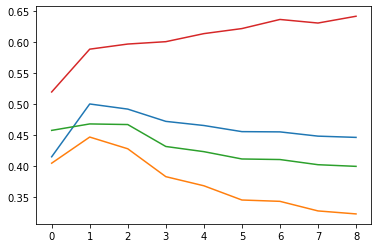

In [ ]:
plt.plot(lst_acc)
plt.plot(lst_f1)
plt.plot(lst_recall)
plt.plot(lst_prec)
plt.show()